In [ ]:
C1 = create_collection(10_000,100,10,50_000,0.1,0.01)

In [ ]:
C2 = create_collection(100_000,100,100,50_000,0.1,0.01)

In [ ]:
C3 = create_collection(100_000,10,1000,50_000,0.1,0.01)

In [ ]:
import numpy as np
import sklearn as sk
import gensim 


### VERSION --- V x T phi --- each word has a distibution of topics for that word 

# got choice over multinomial - get index instead of list with chosen value
# https://stackoverflow.com/questions/36952419/vectorizing-numpy-random-multinomial


C1 = (10_000,100,10,50_000,0.1,0.01)
C2 = (100_000,100,100,50_000,0.1,0.01) 
C3 = (100_000,10,1000,50_000,0.1,0.01)

def create_collection(M, N, T, V, alpha, beta):
    # M = Number of Docs 
    # N = Max words in doc 
    # T = Number of Topics
    # V = Vocab Size
    
    # GENERATE THETA --- M x T
    alpha = np.full(T, alpha)
    theta = np.random.dirichlet(alpha, M)
    
    #GENERATE PHI --- T x V
    beta = np.full(T, beta)
    phi = np.random.dirichlet(beta, V)
        
    
    # for each doc 
    DocTopicForWord = []
    DocWordFromTopic = []
    for i, Doc in enumerate(theta):
        
        if (i % 100) == 0:
            print("Done", i, "Docs")
         
        TopicForWord = []
        WordFromTopic = []
        # for each word in doc 
        for j in range(N):
            
            # 3. a)
            #For each word in a doc pick a topic from the doc 
            topic = np.random.choice(np.arange(T), p=Doc)
            TopicForWord.append(topic)
            
            # 3. b)
            #For each word in a doc choose a word from phi - based on the choosen word above
            # gets vocab for topic 
            
            # NEW
            
            phi_normal = phi.T[topic] / sum(phi.T[topic])
            
            word = np.random.choice(np.arange(V), p=phi_normal)  # + (topic * V)
            WordFromTopic.append(word)
        
        
#         # 3. a) --- Faster 
#         TopicForWord = np.random.choice(np.arange(T), p=Doc, size=N)
#         # 3. b) --- Faster
#         WordFromTopic = np.random.choice(np.arange(V), p=phi[topic], size=N)
        
        DocTopicForWord.append(TopicForWord)
        DocWordFromTopic.append(WordFromTopic)
        
        D = np.array(DocTopicForWord)
        A = np.array(DocWordFromTopic)
        
    sum1 = 0
    for i in range(T):
        sum1 = sum1 + phi[i][0]

    print(sum1)
    
    print(theta.shape, phi.shape)
        
    
    
    # A topic for each word, Found by:
    # For each word in a doc, get a topic index by randomly choosing from a list [1...T] using the P in theta for each Doc
    print("\n\nDocTopicForWord", D.shape, DocTopicForWord[:1]) 
    
    # A Word for each word, Found by:
    # For each word in a doc, get a word index by randomly choosing from a list [1...V] using the P in phi for each topic
    print("DocWordFromTopic", A.shape, DocWordFromTopic[:1])
    
    a = np.random.multinomial(10, theta[0])
    
    print(theta[0])
    print(a)
    
    return DocTopicForWord, DocWordFromTopic, theta, phi
    

collection0 = create_collection(100, 15, 10, 500, 0.1, 0.01)
# collection1 = create_collection(10_000,100,10,50_000,0.1,0.01)



In [232]:
print("hello world")


### VERSION --- T x V phi --- each topic has a distibution of words for that topic 

import numpy as np
import sklearn as sk
import gensim 



# got choice over multinomial - get index instead of list with chosen value
# https://stackoverflow.com/questions/36952419/vectorizing-numpy-random-multinomial


C1Params = (10_000,100,10,50_000,0.1,0.01)
C2Params = (100_000,100,100,50_000,0.1,0.01) 
C3Params = (100_000,10,1000,50_000,0.1,0.01)

def create_collection(M, N, T, V, alpha, beta):
    # M = Number of Docs 
    # N = Max words in doc 
    # T = Number of Topics
    # V = Vocab Size
    
    # GENERATE THETA --- M x T
    alpha = np.full(T, alpha)
    theta = np.random.dirichlet(alpha, M)
    
    #GENERATE PHI --- T x V
    beta = np.full(V, beta)
    phi = np.random.dirichlet(beta, T)
        
    
    # for each doc 
    DocTopicForWord = []
    DocWordFromTopic = []
    for i, Doc in enumerate(theta):
        
        if (i % 100) == 0:
            print("Done", i, "Docs")
         
        TopicForWord = []
        WordFromTopic = []
        # for each word in doc 
        for j in range(N):
            
            # 3. a)
            #For each word in a doc pick a topic from the doc 
            topic = np.random.choice(np.arange(T), p=Doc)
            TopicForWord.append(topic)
            
            # 3. b)
            #For each word in a doc choose a word from phi - based on the choosen word above
            # gets vocab for topic 
            word = np.random.choice(np.arange(V), p=phi[topic])  # + (topic * V)
            WordFromTopic.append(word)
        
        
#         # 3. a) --- Faster 
#         TopicForWord = np.random.choice(np.arange(T), p=Doc, size=N)
#         # 3. b) --- Faster
#         WordFromTopic = np.random.choice(np.arange(V), p=phi[topic], size=N)
        
        DocTopicForWord.append(TopicForWord)
        DocWordFromTopic.append(WordFromTopic)
        
        D = np.array(DocTopicForWord)
        A = np.array(DocWordFromTopic)
        
    sum1 = 0
    for i in range(T):
        sum1 = sum1 + phi[i][0]

    print(sum1)
    
    print(theta.shape, phi.shape)
        
    
    
    # A topic for each word, Found by:
    # For each word in a doc, get a topic index by randomly choosing from a list [1...T] using the P in theta for each Doc
    print("\n\nDocTopicForWord", D.shape, DocTopicForWord[:1]) 
    
    # A Word for each word, Found by:
    # For each word in a doc, get a word index by randomly choosing from a list [1...V] using the P in phi for each topic
    print("DocWordFromTopic", A.shape, DocWordFromTopic[:1])
    
    return DocTopicForWord, DocWordFromTopic, theta, phi
    

collection0 = create_collection(1000, 15, 10, 500, 0.1, 0.01)
# collection1 = create_collection(10_000,100,10,50_000,0.1,0.01)





hello world
Done 0 Docs
Done 100 Docs
Done 200 Docs
Done 300 Docs
Done 400 Docs
Done 500 Docs
Done 600 Docs
Done 700 Docs
Done 800 Docs
Done 900 Docs
0.024929452872102225
(1000, 10) (10, 500)


DocTopicForWord (1000, 15) [[0, 7, 9, 9, 7, 7, 7, 7, 0, 7, 9, 9, 9, 7, 9]]
DocWordFromTopic (1000, 15) [[315, 33, 125, 144, 408, 35, 245, 164, 338, 418, 292, 125, 278, 448, 125]]


In [ ]:
# Topic models - approach to modelling docs 
# assumes document has many topics

# latent Dirichlet Allocation (LDA) - Baysian Topic model
#    Defines a "generative process" for docs - a recipe for sampling new docs from a complex joint distribution

# Normally - infer posterior distribution from observed text docs
# This case - sample docs from prior distribution 


Done 0 Docs
1.1543250549896507
(100, 10) (500, 10)


DocTopicForWord (100, 15) [[1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
DocWordFromTopic (100, 15) [[104, 301, 180, 120, 368, 423, 185, 425, 292, 234, 412, 368, 18, 351, 458]]
[3.49675567e-06 9.97055694e-01 8.52667030e-06 2.66547341e-06
 6.98583782e-04 1.68824722e-14 3.52534533e-05 1.12931011e-03
 5.30033610e-13 1.06646999e-03]
[ 0 10  0  0  0  0  0  0  0  0]


In [144]:
#want postiror - data from smapling 
# want --- plot, topic x-axis, number of occurances overall as y-axis

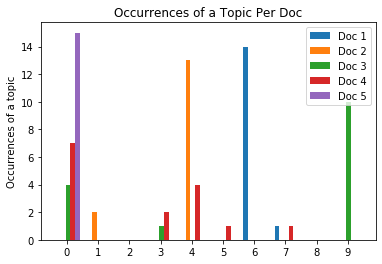

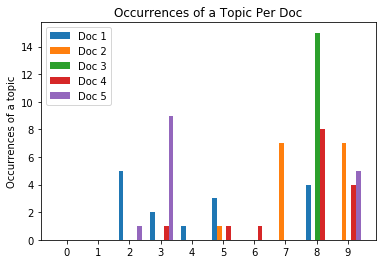

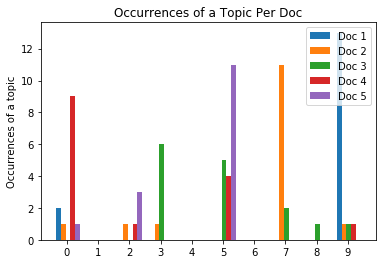

In [235]:
# Q1 - Pick 5 Docs

import matplotlib.pyplot as plt
import numpy as np


collections = [collection0, collection0, collection0]

for i in range(3):
    
    DocTopicForWord, DocWordFromTopic, theta, phi = collections[i]
    
    vocabLen = len(phi[0]) 
    topicLen = len(phi)
    numDocs = len(theta)
    
    DocTopics = []
    for j in range(5):
        
        targetDoc = np.random.choice(np.arange(numDocs))
        
        Doc = DocTopicForWord[targetDoc]
        topicOccrs = Counter(Doc)
        sparse = []
        for k in range(topicLen):
            sparse.append(topicOccrs.get(k, 0))

        DocTopics.append(sparse)
    
#         print(sparse)

    theta1 = DocTopics[0]
    theta2 = DocTopics[1]
    theta3 = DocTopics[2]
    theta4 = DocTopics[3]
    theta5 = DocTopics[4]
    
#     theta1 = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,]
#     theta2 = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,]
#     theta3 = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,]
#     theta4 = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,]
#     theta5 = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,]

    X = np.arange(topicLen) - 0.27
    width = 0.15
    
    plt.bar(X + width * 0, theta1, width, label='Doc 1')
    plt.bar(X + width * 1, theta2, width, label='Doc 2')
    plt.bar(X + width * 2, theta3, width, label='Doc 3')
    plt.bar(X + width * 3, theta4, width, label='Doc 4')
    plt.bar(X + width * 4, theta5, width, label='Doc 5')

    plt.ylabel('Occurrences of a topic')
    plt.title('Occurrences of a Topic Per Doc')

    plt.xticks(np.arange(topicLen))
    plt.legend(loc='best')
    plt.show()






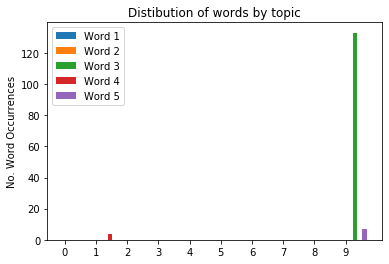

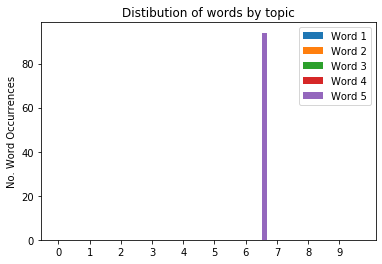

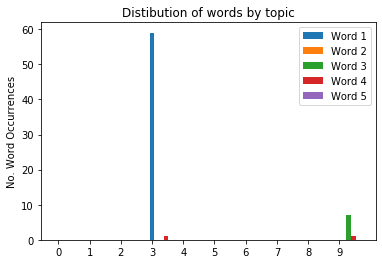

In [240]:
# Q1 - Pick 5 Words

import matplotlib.pyplot as plt
import numpy as np


collections = [collection0, collection0, collection0]


# P of word in Vocab 
for i in range(3):
 
    DocTopicForWord, DocWordFromTopic, theta, phi = collections[i]

    vocabLen = len(phi[0]) 
    topicLen = len(phi)
    
    wordOccurs = []
    for i in range(5):
        targetword = np.random.choice(np.arange(vocabLen))

        count = np.zeros(topicLen)

        # for each topic
        for i, doc in enumerate(DocWordFromTopic):
            for j, word in enumerate(doc):
                if word == targetword:
                    count[DocTopicForWord[i][j]] = count[DocTopicForWord[i][j]] + 1

        wordOccurs.append(count)
        
#         print(count)
  
    phi1 = wordOccurs[0]
    phi2 = wordOccurs[1]
    phi3 = wordOccurs[2]
    phi4 = wordOccurs[3]
    phi5 = wordOccurs[4]
    
    
    X = np.arange(topicLen) - 0.27
    width = 0.15
    
    plt.bar(ind, phi1, width, label='Word 1')
    plt.bar(ind + width, phi2, width, label='Word 2')
    plt.bar(ind + width * 2, phi3, width, label='Word 3')
    plt.bar(ind + width * 3, phi4, width, label='Word 4')
    plt.bar(ind + width * 4, phi5, width, label='Word 5')

    plt.ylabel('No. Word Occurrences')
    plt.title('Distibution of words by topic')

    plt.xticks(np.arange(topicLen))
    plt.legend(loc='best')
    plt.show()



In [ ]:
#Q 2 

# the collection with the most number of average topics per document  
# the degree could be quanified by either:
#    - The overall number of possible topic for the collection 
#    - Or the collection with the highest above number 
# 
# Differebt number of possible topics for the collection 
#
#



In [97]:


phi = collection0[3]

print(phi.T)



[[6.12684845e-010 1.95659344e-032 3.31483222e-089 ... 3.08263100e-022
  6.84570675e-022 5.00020206e-164]
 [1.45729234e-057 4.40215210e-037 2.39440313e-190 ... 1.50842369e-040
  5.26208169e-004 1.12718697e-025]
 [7.35602342e-027 2.62465485e-022 2.21603368e-014 ... 1.40514838e-007
  1.32717209e-033 1.73440250e-011]
 ...
 [3.66418390e-131 1.31386367e-018 1.31437794e-089 ... 5.82043996e-059
  1.41500157e-021 5.85555877e-004]
 [1.83244242e-122 1.81974543e-121 3.87647322e-002 ... 3.72051748e-032
  3.25760117e-064 2.11477235e-077]
 [6.14259897e-020 2.19865756e-026 5.08793296e-003 ... 2.33814434e-006
  9.08869589e-065 2.62231347e-095]]


In [219]:
# Q3 

def cosine_similarity(doc1, doc2):
    productTop = 0
    for i in range(doc1.size):
        productTop = productTop + (doc1[i] * doc2[i])

    productBottum = len(doc1) * len(doc2)

    cosine_sim = productTop / productBottum
    return cosine_sim


collections = [collection0, collection0, collection0]

# Docs 
for col in range(3):
    
    DocTopicForWord, DocWordFromTopic, theta, phi = collections[col]
    numDocs = len(DocTopicForWord)
    vocabLen = len(phi)
    
    
    docs = []
    cosSim = 0
    for i in range(100):
        doc = np.random.choice(np.arange(numDocs), replace=False, size=2)
        cosSim = cosSim + cosine_similarity(theta[doc[0]], theta[doc[1]])

    print("collection", col, "Doc sim is ", cosSim)



    #Words
    docs = []
    cosSim = 0
    for i in range(100):
        doc = np.random.choice(np.arange(vocabLen), replace=False, size=2)
        cosSim = cosSim + cosine_similarity(phi[doc[0]], phi[doc[1]])

    print("collection", col, "word sim is", cosSim)



collection 0 Doc sim is  0.09090280663511088
collection 0 word sim is 0.09806215084607471
collection 1 Doc sim is  0.0719097993113821
collection 1 word sim is 0.12935430487177807
collection 2 Doc sim is  0.0989470298162901
collection 2 word sim is 0.09090839904749326


In [289]:
# M x T
def get_theta(alpha, MDocs, TTopics):
     
    alpha = np.full(TTopics, alpha)
    theta = np.random.dirichlet(alpha, MDocs)
    return theta

def get_phi(beta, TTopics, VVocab):
    
    beta = np.full(VVocab, beta)
    phi = np.random.dirichlet(beta, TTopics)
    return phi



    
#     for i, Doc in enumerate(theta):
#         # for each Document D
        
#         # Doc = P of each topic 
        
#         # 3. a)
#         # for each doc pick 10 topics bassed on the theta distrubution 
#         DocwordTopic = np.random.choice(np.arange(T), p=Doc, size = N) 
#         DocWordTopics.append(DocwordTopic)
        
#         # index of topic for each word based on input doc (doc = P of each topic )
        
# #         D = np.random.choice(np.arange(T), p=Doc, size=1)
        
    
    

#         3. b)
#         choose a word w_i,j from phi_(z_i,j) ----- choose word from the chosen topic 
#         for word topic index = i, get phi[i], choose word - index, alreay is probs 
#         for TopicIndex in DocwordTopic:
            
#             # word_ij = np.random.multinomial(1, phi[TopicIndex]) <--- gives list --- \/ gives index \/
#             word_ij = np.random.choice(np.arange(V),p=phi[TopicIndex]) 
#             DocWordChoice.append(word_ij)




    # shape = (1000 x 10)
    DocWordTopics = np.array(DocWordTopics[:3])
    
    # shape = (10000 x 1)
    DocWordChoice = np.array(DocWordChoice)
        
    print("INFORMATION")
    print("theta + phi Shape :", theta.shape, phi.shape)
    print("DocWordTopics:", DocWordTopics.shape, DocWordTopics[:3])
    print("DocWordChoice:", DocWordChoice.shape, DocWordChoice[:3])
    

C:\Users\callu\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\callu\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\callu\Anaconda3\lib\site-packages\sklearn\metrics\pairw

[0 2 0]
[[2, 0, 0, 0, 0, 0, 0, 7, 0, 6], [0, 0, 1, 0, 0, 14, 0, 0, 0, 0], [0, 0, 0, 1, 2, 0, 0, 0, 12, 0]]
[[-8.78345062  2.10410324]
 [-0.70777457  0.02019144]
 [-9.7354944  -0.42997697]]


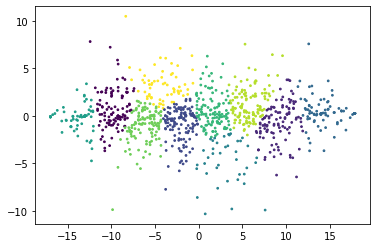

purity : 0.38


In [361]:
# Q4 Clustering the Documents of the Synthetic Collections
# Task 1 - implement K-means clustering 

# from sklearn.cluster import KMeans
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt


# NOTES
# clustering like documents


DocTopicForWord, DocWordFromTopic, theta, phi = collection0

# get the correct class/topic for each document - one with highest P 
def get_class(doc_porbabilities):
    class_labels = []
    for doc in theta:
        cls = np.argmax(doc)
        class_labels.append(cls)
        
    return class_labels

#Caclulates purity
def purity(k, cluster_Set, j, class_lables):
    
    # make confusion matrix
    confusion_matrix = np.zeros((k, k))    
    for cluster in range(cluster_Set.size): 
        
        actual_topic = class_lables[cluster]        
        confusion_matrix[cluster_Set[cluster]][actual_topic] = confusion_matrix[cluster_Set[cluster]][actual_topic] + 1
    
    # get purity
    row_max = 0
    for row in confusion_matrix:
        row_max = row_max + max(row)
        
    purity = row_max / j
    return purity
        
    

targetDoc = 0
vocabLen = len(phi[0]) 
topicLen = len(phi)
numDocs = len(theta)
class_lables = get_class(theta)


k = 10


# simplify data d=10 ---> d=2
pca = sklearn.decomposition.PCA(n_components=2)
pca_data = pca.fit_transform(DocTopicForWord)

cluster = sk.cluster.KMeans(n_clusters=k)
cluster_set = cluster.fit_predict(pca_data)


print(cluster_set[:3])
print(DocTopics[:3])
print(pca_data[:3])



x = pca_data.T[0]
y = pca_data.T[1]
colors = cluster_set
area = 3  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=1)
plt.show()

p = purity(k, cluster_set, num_classes, class_lables)
print("purity :", p)
    
    
